<a href="https://colab.research.google.com/github/Nandhinisaravanann/OutriX_tasks/blob/main/OutriX_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance plotly

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime
import numpy as np

In [ ]:
#FETCH DATA FROM YAHOO FINANCE
# ==============================================
ticker = "RELIANCE.NS"
start_date = "2018-01-01"
end_date = "2025-10-15"

In [ ]:
print(f"Fetching data for {ticker} from {start_date} to {end_date}...")
df = yf.download(ticker, start=start_date, end=end_date)
# Flatten multi-level column names
df.columns = ['_'.join(col).strip() for col in df.columns.values]
df = df.rename(columns={"Adj_Close_RELIANCE.NS": "Adj_Close"})
df.dropna(inplace=True)
print("Data fetched successfully!")
print(df.head())

Fetching data for RELIANCE.NS from 2018-01-01 to 2025-10-15...


/tmp/ipython-input-4122788822.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Data fetched successfully!
            Close_RELIANCE.NS  High_RELIANCE.NS  Low_RELIANCE.NS  \
Date                                                               
2018-01-01         401.864807        407.585208       400.870911   
2018-01-02         402.483246        406.193799       400.385024   
2018-01-03         404.095520        409.042914       403.322483   
2018-01-04         406.525085        407.187693       404.493122   
2018-01-05         407.828186        409.440517       406.503001   

            Open_RELIANCE.NS  Volume_RELIANCE.NS  
Date                                              
2018-01-01        407.585208             9453202  
2018-01-02        403.300454             9499419  
2018-01-03        408.601166            13507800  
2018-01-04        405.575361             9008932  
2018-01-05        407.187694             7441284  


In [ ]:
#Explore data
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1923 entries, 2018-01-01 to 2025-10-14
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Close_RELIANCE.NS   1923 non-null   float64
 1   High_RELIANCE.NS    1923 non-null   float64
 2   Low_RELIANCE.NS     1923 non-null   float64
 3   Open_RELIANCE.NS    1923 non-null   float64
 4   Volume_RELIANCE.NS  1923 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 90.1 KB
None
       Close_RELIANCE.NS  High_RELIANCE.NS  Low_RELIANCE.NS  Open_RELIANCE.NS  \
count        1923.000000       1923.000000      1923.000000       1923.000000   
mean          978.989109        989.313697       969.363212        979.596942   
std           335.869810        338.033330       333.874890        335.944696   
min           389.915985        395.724760       384.747713        387.398112   
25%           633.619751        643.797041       624.523049        632.1

In [ ]:
#BASIC STATISTICS
# ==============================================
df['Daily_Return'] = df['Close_RELIANCE.NS'].pct_change()
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()
print("\nCLOSE PRICE SUMMARY:\n", df['Close_RELIANCE.NS'].describe())
print("\nRETURN SUMMARY:\n", df['Daily_Return'].describe())
print("\nVOLUME SUMMARY:\n", df['Volume_RELIANCE.NS'].describe())


CLOSE PRICE SUMMARY:
 count    1923.000000
mean      978.989109
std       335.869810
min       389.915985
25%       633.619751
50%      1073.623535
75%      1225.599121
max      1589.138184
Name: Close_RELIANCE.NS, dtype: float64

RETURN SUMMARY:
 count    1922.000000
mean        0.000797
std         0.017748
min        -0.131539
25%        -0.008656
50%         0.000688
75%         0.009371
max         0.147180
Name: Daily_Return, dtype: float64

VOLUME SUMMARY:
 count    1.923000e+03
mean     1.842838e+07
std      1.405973e+07
min      0.000000e+00
25%      1.028400e+07
50%      1.432192e+07
75%      2.124233e+07
max      1.426834e+08
Name: Volume_RELIANCE.NS, dtype: float64


In [ ]:
#TECHNICAL INDICATORS
# ==============================================
df['MA20'] = df['Close_RELIANCE.NS'].rolling(20).mean()
df['MA50'] = df['Close_RELIANCE.NS'].rolling(50).mean()
df['MA200'] = df['Close_RELIANCE.NS'].rolling(200).mean()

# Bollinger Bands
df['STD20'] = df['Close_RELIANCE.NS'].rolling(20).std()
df['BB_upper'] = df['MA20'] + 2*df['STD20']
df['BB_lower'] = df['MA20'] - 2*df['STD20']

# RSI (Relative Strength Index)
delta = df['Close_RELIANCE.NS'].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)
avg_gain = pd.Series(gain).rolling(14).mean()
avg_loss = pd.Series(loss).rolling(14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Volatility
df['Daily_Return'] = df['Close_RELIANCE.NS'].pct_change()
df['Volatility'] = df['Daily_Return'].rolling(20).std() * np.sqrt(252)

# SMA crossover signal
df['Signal'] = 0
df.loc[df['MA20'] > df['MA50'], 'Signal'] = 1
df['Signal_change'] = df['Signal'].diff()
buy_signals = df[df['Signal_change'] == 1]
sell_signals = df[df['Signal_change'] == -1]

print("\n🚦 Last 10 Buy/Sell signals:")
print(df[df['Signal_change'] != 0].tail(10))


🚦 Last 10 Buy/Sell signals:
            Close_RELIANCE.NS  High_RELIANCE.NS  Low_RELIANCE.NS  \
Date                                                               
2024-04-19        1459.323975       1463.170505      1432.423103   
2024-05-02        1455.775269       1466.471007      1453.368037   
2024-06-13        1454.484741       1461.433312      1449.372554   
2024-08-13        1452.871704       1459.274267      1447.288031   
2025-02-05        1273.115234       1285.366353      1271.621201   
2025-02-18        1220.525391       1225.007490      1211.262337   
2025-04-01        1247.617065       1272.816469      1244.330266   
2025-08-01        1388.155762       1400.307303      1378.793253   
2025-10-10        1381.699951       1388.000000      1375.099976   
2025-10-13        1375.000000       1377.699951      1367.800049   

            Open_RELIANCE.NS  Volume_RELIANCE.NS  Daily_Return  \
Date                                                             
2024-04-19       1446.

In [ ]:
#RETURN ANALYSIS
# ==============================================
daily_returns = df['Daily_Return'].resample('D').sum()
monthly_returns = df['Daily_Return'].resample('M').sum()
yearly_returns = df['Daily_Return'].resample('Y').sum()

print("\nYearly Returns:")
print(yearly_returns.tail(10))

top10 = df['Daily_Return'].nlargest(10)
bottom10 = df['Daily_Return'].nsmallest(10)
print("\nTop 10 Best Days:\n", top10)
print("\nWorst 10 Days:\n", bottom10)

/tmp/ipython-input-3659943457.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = df['Daily_Return'].resample('M').sum()
/tmp/ipython-input-3659943457.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_returns = df['Daily_Return'].resample('Y').sum()



Yearly Returns:
Date
2018-12-31    0.250456
2019-12-31    0.341137
2020-12-31    0.393120
2021-12-31    0.212659
2022-12-31    0.110830
2023-12-31    0.113023
2024-12-31   -0.032551
2025-12-31    0.144070
Freq: YE-DEC, Name: Daily_Return, dtype: float64

Top 10 Best Days:
 Date
2020-03-25    0.147180
2020-04-07    0.119402
2020-03-20    0.109240
2020-04-22    0.102032
2019-08-13    0.096937
2020-03-31    0.080838
2020-09-10    0.070627
2020-08-04    0.070483
2024-01-29    0.070192
2020-03-24    0.067134
Name: Daily_Return, dtype: float64

Worst 10 Days:
 Date
2020-03-23   -0.131539
2020-03-09   -0.123407
2020-11-02   -0.086177
2020-03-16   -0.081064
2020-03-12   -0.078497
2024-06-04   -0.074851
2022-07-01   -0.072024
2018-10-04   -0.068749
2018-10-05   -0.065404
2020-05-12   -0.061866
Name: Daily_Return, dtype: float64


In [ ]:
#MAXIMUM DRAWDOWN
# ==============================================
cumulative = df['Cumulative_Return']
rolling_max = cumulative.cummax()
drawdown = (cumulative - rolling_max) / rolling_max
max_drawdown = drawdown.min()
max_drawdown_date = drawdown.idxmin()
print(f"\nMaximum Drawdown: {max_drawdown:.2%} on {max_drawdown_date}")


Maximum Drawdown: -45.09% on 2020-03-23 00:00:00



🔗 Correlation Matrix:
                     Open_RELIANCE.NS  High_RELIANCE.NS  Low_RELIANCE.NS  \
Open_RELIANCE.NS            1.000000          0.999583         0.999551   
High_RELIANCE.NS            0.999583          1.000000         0.999464   
Low_RELIANCE.NS             0.999551          0.999464         1.000000   
Close_RELIANCE.NS           0.999100          0.999652         0.999624   
Volume_RELIANCE.NS         -0.283591         -0.273370        -0.292236   

                    Close_RELIANCE.NS  Volume_RELIANCE.NS  
Open_RELIANCE.NS             0.999100           -0.283591  
High_RELIANCE.NS             0.999652           -0.273370  
Low_RELIANCE.NS              0.999624           -0.292236  
Close_RELIANCE.NS            1.000000           -0.282237  
Volume_RELIANCE.NS          -0.282237            1.000000  


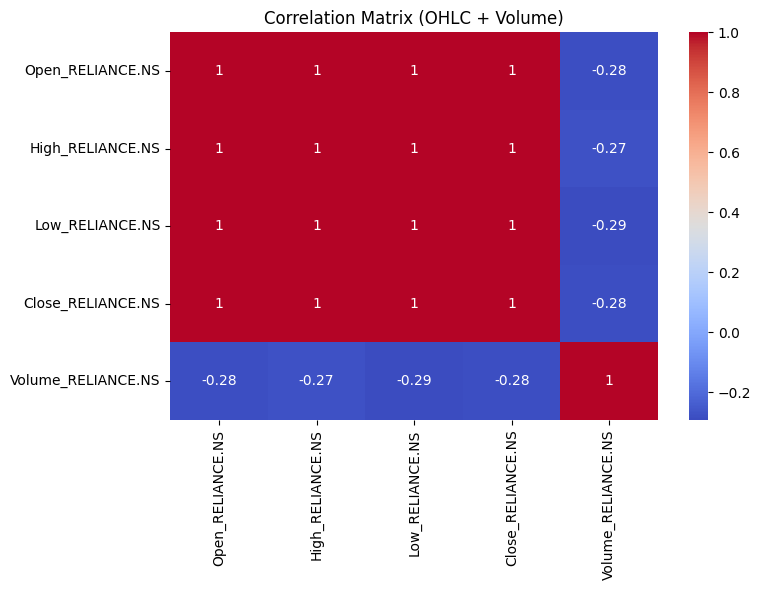

In [ ]:
import seaborn as sns
#CORRELATION MATRIX
# ==============================================
corr = df[['Open_RELIANCE.NS','High_RELIANCE.NS','Low_RELIANCE.NS','Close_RELIANCE.NS','Volume_RELIANCE.NS']].corr()
print("\n🔗 Correlation Matrix:\n", corr)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (OHLC + Volume)')
plt.tight_layout()
plt.savefig('/content/reliance_corr_heatmap.png')
plt.show()

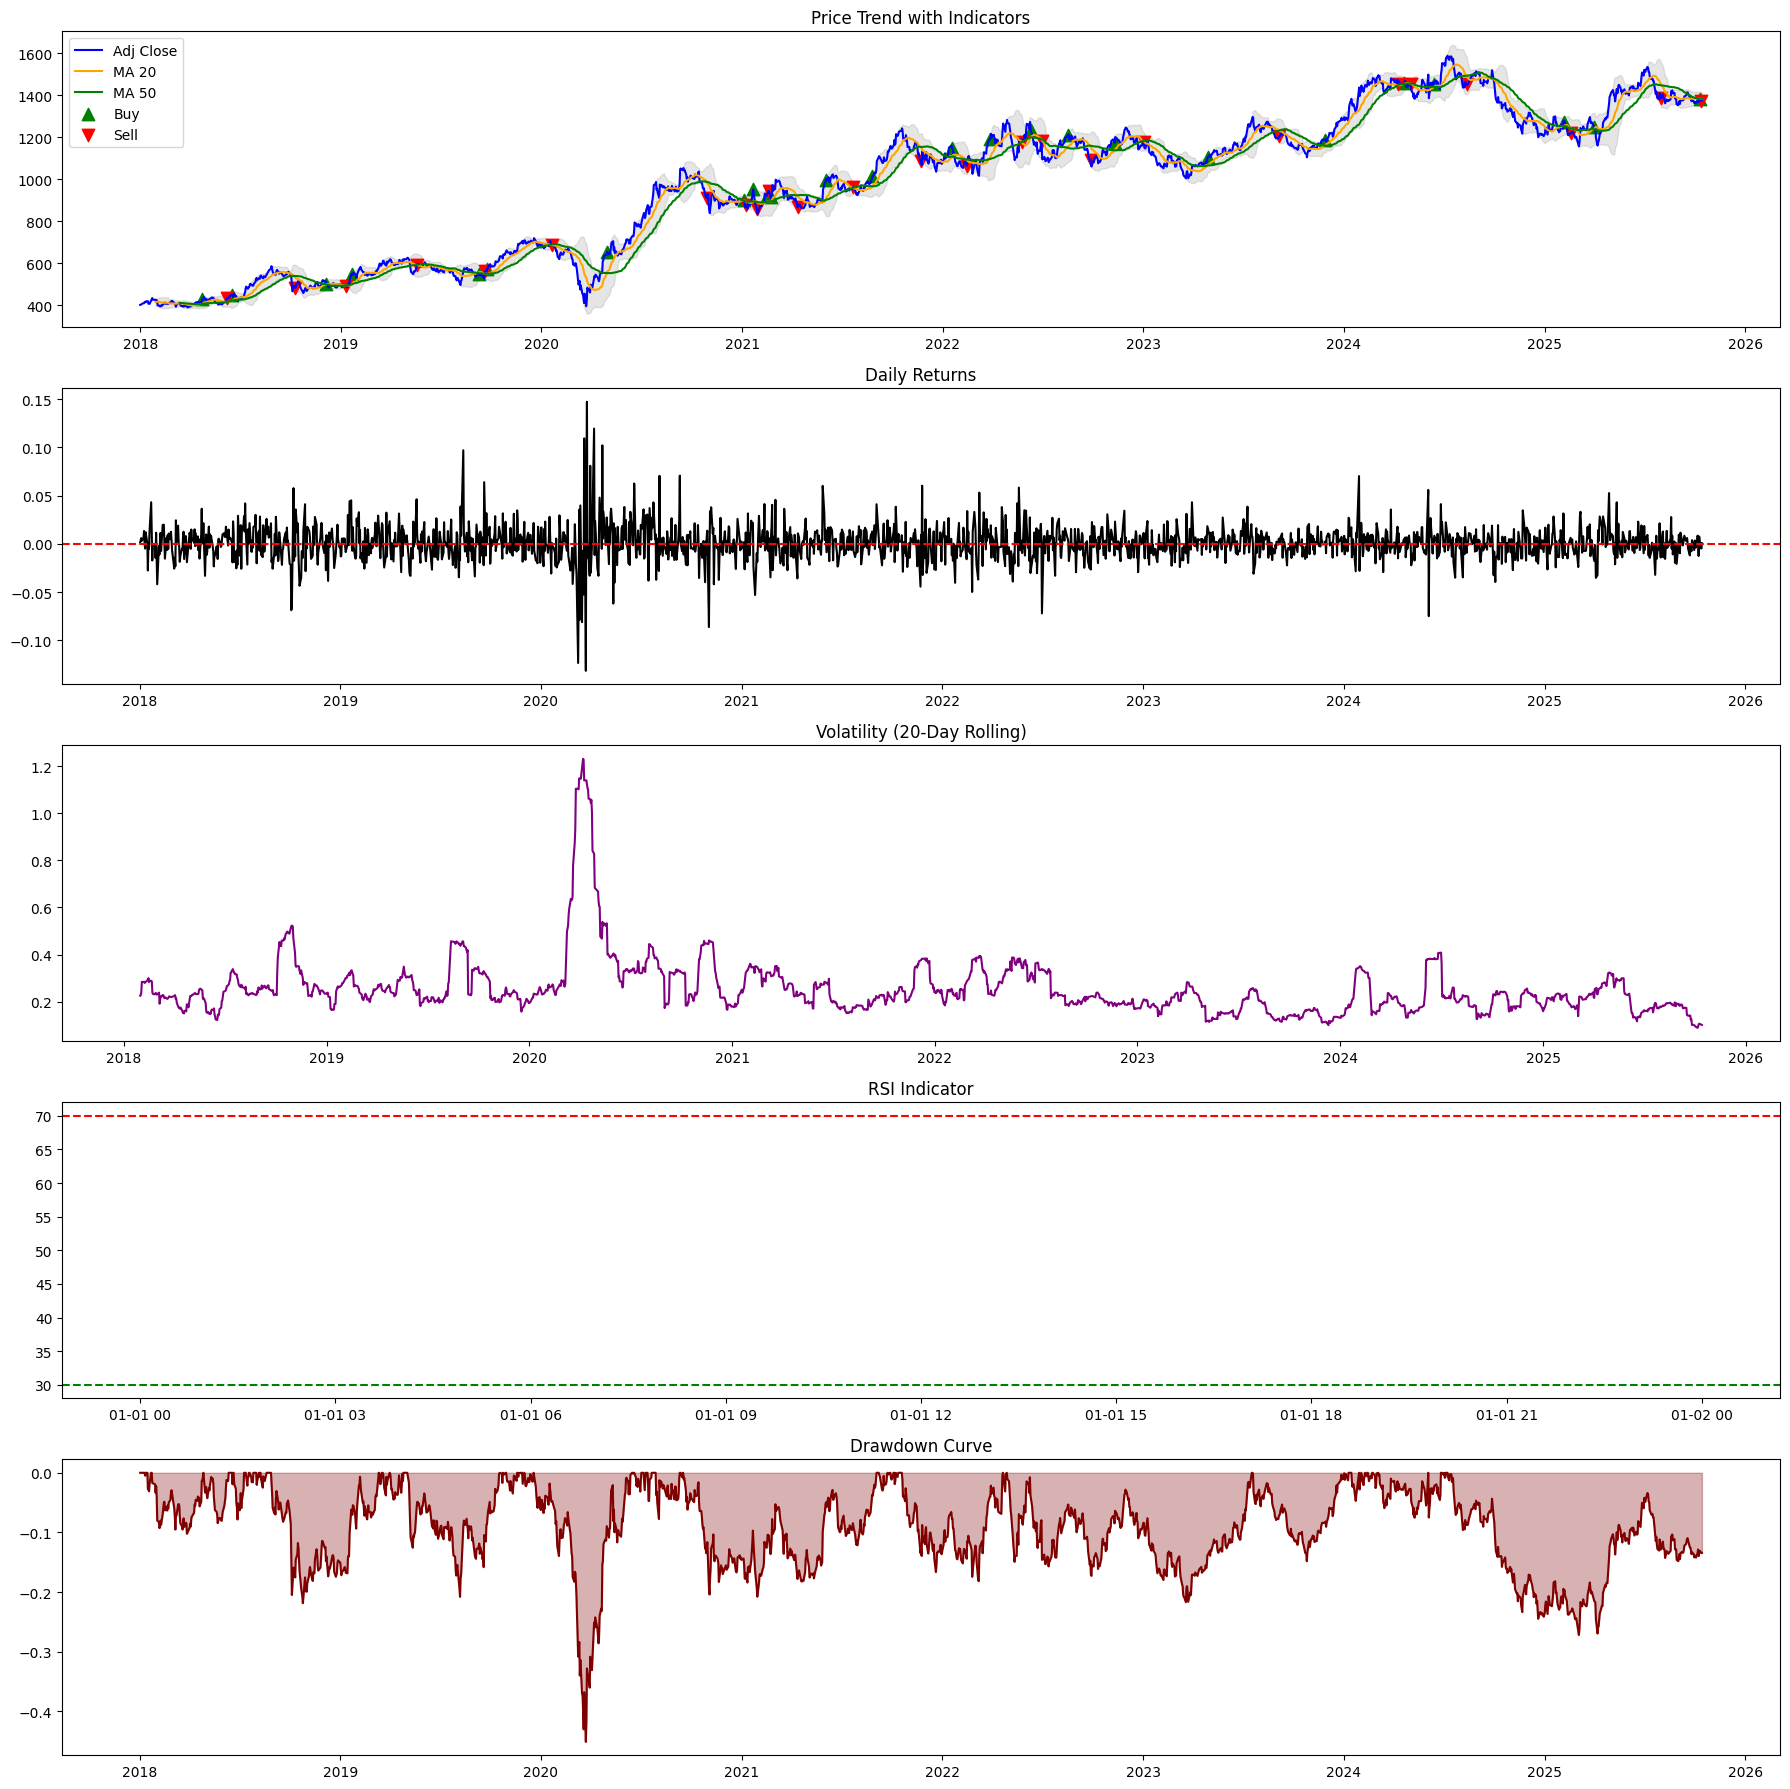

Saved chart: /mnt/data/reliance_full_analysis.png


In [ ]:
#STATIC PLOTS
# ==============================================
plt.figure(figsize=(18, 18))

# 1. Price + MA + Bollinger
plt.subplot(5, 1, 1)
plt.plot(df.index, df['Close_RELIANCE.NS'], label='Adj Close', color='blue')
plt.plot(df.index, df['MA20'], label='MA 20', color='orange')
plt.plot(df.index, df['MA50'], label='MA 50', color='green')
plt.fill_between(df.index, df['BB_lower'], df['BB_upper'], color='gray', alpha=0.2)
plt.scatter(buy_signals.index, buy_signals['Close_RELIANCE.NS'], marker='^', color='green', s=80, label='Buy')
plt.scatter(sell_signals.index, sell_signals['Close_RELIANCE.NS'], marker='v', color='red', s=80, label='Sell')
plt.title('Price Trend with Indicators')
plt.legend()

# 2. Daily Returns
plt.subplot(5, 1, 2)
plt.plot(df.index, df['Daily_Return'], color='black')
plt.axhline(0, color='red', linestyle='--')
plt.title('Daily Returns')

# 3. Volatility
plt.subplot(5, 1, 3)
plt.plot(df.index, df['Volatility'], color='purple')
plt.title('Volatility (20-Day Rolling)')

# 4. RSI
plt.subplot(5, 1, 4)
plt.plot(df.index, df['RSI'], color='brown')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('RSI Indicator')

# 5. Drawdown
plt.subplot(5, 1, 5)
plt.plot(drawdown.index, drawdown, color='maroon')
plt.fill_between(drawdown.index, drawdown, 0, color='maroon', alpha=0.3)
plt.title('Drawdown Curve')

plt.tight_layout()
plt.savefig('/content/reliance_full_analysis.png')
plt.show()

print("Saved chart: /mnt/data/reliance_full_analysis.png")

In [ ]:
# INTERACTIVE DASHBOARD
# ==============================================
fig = go.Figure()

# Candlestick chart
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['Open_RELIANCE.NS'], high=df['High_RELIANCE.NS'], low=df['Low_RELIANCE.NS'], close=df['Close_RELIANCE.NS'],
    name='Candlestick'
))
# Indicators
fig.add_trace(go.Scatter(x=df.index, y=df['MA20'], mode='lines', name='MA 20', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=df.index, y=df['MA50'], mode='lines', name='MA 50', line=dict(color='green')))
fig.add_trace(go.Scatter(x=df.index, y=df['BB_upper'], mode='lines', name='BB Upper', line=dict(dash='dot', color='gray')))
fig.add_trace(go.Scatter(x=df.index, y=df['BB_lower'], mode='lines', name='BB Lower', line=dict(dash='dot', color='gray'), fill='tonexty'))

# Buy/Sell markers
fig.add_trace(go.Scatter(
    x=buy_signals.index, y=buy_signals['Close_RELIANCE.NS'], mode='markers',
    marker=dict(symbol='triangle-up', size=10, color='green'), name='Buy'
))
fig.add_trace(go.Scatter(
    x=sell_signals.index, y=sell_signals['Close_RELIANCE.NS'], mode='markers',
    marker=dict(symbol='triangle-down', size=10, color='red'), name='Sell'
))

fig.update_layout(
    title="📊 Reliance Industries (RELIANCE.NS) — Advanced Stock Dashboard",
    xaxis_title="Date",
    yaxis_title="Price",
    xaxis_rangeslider_visible=False,
    template="plotly_dark",
    height=700
)
fig.show()